In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# Load the CSV file
file_path = "/Users/jillmunger/Desktop/Manta/datamining_data/output/MILLIDEC_MinRes/ch_BVI_mangroves_6863_20240323_000524/2024/csv/BVI_mangroves_6863.1.48000_20240323_DAILY_MILLIDEC_MinRes.csv"  # Replace with actual path
df = pd.read_csv(file_path, parse_dates=[0])

In [92]:
# Extract hour and date
df['hour'] = df.iloc[:, 0].dt.hour
df['date'] = df.iloc[:, 0].dt.date

# Drop the datetime column
df.drop(df.columns[[0,1]], axis=1, inplace=True)

print(df[['hour', 'date']].head())
df.head()

   hour        date
0     0  2024-03-23
1     0  2024-03-23
2     0  2024-03-23
3     0  2024-03-23
4     0  2024-03-23


,0.1,1,2,3,4,5,6,7,8,9,...,23632,23686.5,23741.1,23795.8,23850.6,23905.6,23960.7,24000,hour,date
0,67.5,65.5,53.1,43.2,36.1,30.8,26.4,23.1,20.6,18.6,...,0.3,0.6,1.0,1.6,2.1,1.7,1.2,1.3,0,2024-03-23
1,32.1,36.6,31.6,19.3,16.7,15.9,14.0,12.8,12.5,13.5,...,0.4,0.4,0.7,1.0,1.0,1.3,1.2,0.9,0,2024-03-23
2,32.7,36.8,31.6,19.1,16.4,14.5,12.5,12.4,12.0,13.2,...,-0.2,0.1,0.6,0.5,0.3,0.7,1.2,1.2,0,2024-03-23
3,33.6,36.7,31.5,19.4,16.6,14.7,12.1,11.2,12.0,12.1,...,-0.2,-0.3,-0.2,-0.2,-0.2,-1.1,-1.1,-0.5,0,2024-03-23
4,33.2,36.4,31.6,21.1,16.2,14.0,11.7,10.2,10.0,11.3,...,0.8,-0.2,0.2,0.4,0.8,1.0,0.7,1.3,0,2024-03-23


In [93]:
# Convert the 'Frequency' column to numeric and sort the values
df_melted = df.melt(id_vars=['date', 'hour'], var_name="Frequency", value_name="SPL")
df_melted['Frequency'] = pd.to_numeric(df_melted['Frequency'], errors='coerce')
df_melted = df_melted.sort_values('Frequency')

# Pivot the table to create heatmap data with hour on the x-axis and frequency on the y-axis
heatmap_data = df_melted.pivot_table(index="Frequency", columns="hour", values="SPL", aggfunc='mean')

# Reverse the y-axis (frequency)
heatmap_data = heatmap_data.sort_index(ascending=False)


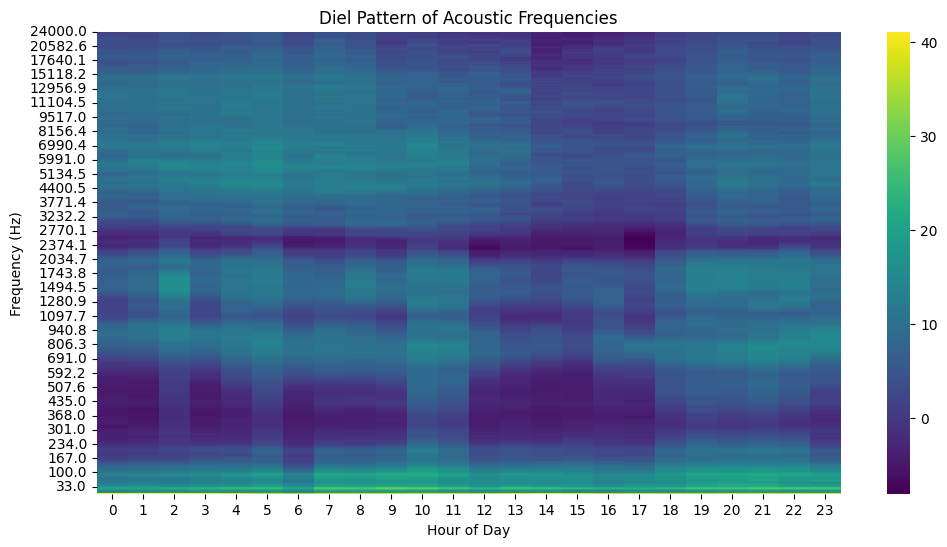

In [94]:
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="viridis")
plt.title("Diel Pattern of Acoustic Frequencies")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency (Hz)")
plt.show()